In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict
from scikitplot.metrics import plot_roc
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.feature_selection import SelectKBest

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA

from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours

from sklearn.cluster import MiniBatchKMeans
from imblearn.under_sampling import ClusterCentroids

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

from sklearn.tree._tree import TREE_LEAF
from sklearn import tree

## Preparation

In [2]:
df_train=pd.read_csv("../../ravdess_features_train_pulito.csv")
df_test=pd.read_csv("../../ravdess_features_test_pulito.csv")

df_train["emotion"]=df_train["emotion"].replace(["fearful", "angry", "happy", "surprised", "neutral", "calm", "sad", "disgust"],[0,1,2,3,4,5,6,7])
df_train["emotional_intensity"]=df_train["emotional_intensity"].replace(["normal", "strong"],[0,1])
df_train["sex"]=df_train["sex"].replace(["M", "F"],[0,1])
df_train["statement"]=df_train["statement"].replace(["Dogs are sitting by the door", "Kids are talking by the door"],[0,1])
df_train["vocal_channel"]=df_train["vocal_channel"].replace(["speech", "song"],[0,1])
X_train=df_train.drop(columns=["sex"]).values
y_train=df_train.sex.values

df_test["emotion"]=df_test["emotion"].replace(["fearful", "angry", "happy", "surprised", "neutral", "calm", "sad", "disgust"],[0,1,2,3,4,5,6,7])
df_test["emotional_intensity"]=df_test["emotional_intensity"].replace(["normal", "strong"],[0,1])
df_test["sex"]=df_test["sex"].replace(["M", "F"],[0,1])
df_test["statement"]=df_test["statement"].replace(["Dogs are sitting by the door", "Kids are talking by the door"],[0,1])
df_test["vocal_channel"]=df_test["vocal_channel"].replace(["speech", "song"],[0,1])
X_test=df_test.drop(columns=["sex"]).values
y_test=df_test.sex.values

In [3]:
#df_train.drop(axis="index", labels=[35,243,451,554,563,658,659,1031,1075,1283], inplace=True)
X_train=df_train.drop(columns=["sex"]).values
y_train=df_train.sex.values

#df_test.drop(axis="index", labels=[33,34,138,196,197,198,199], inplace=True)
X_test=df_test.drop(columns=["sex"]).values
y_test=df_test.sex.values

In [4]:
len(X_train[0]), len(X_test[0])

(376, 376)

In [5]:
np.unique(df_train.sex, return_counts=True)

(array([0, 1]), array([936, 892]))

In [6]:
Tot=100*929/96
x=4*Tot/100
Tot,x

(967.7083333333334, 38.708333333333336)

In [7]:
rows2remove=np.random.choice(df_train[df_train["sex"] == 1].index, 889-39, replace = False)

In [8]:
rows2remove

array([1357, 1219,  772, 1394, 1570,  805,  200,  346,  766, 1386,  388,
        536, 1169, 1376, 1789, 1810,  586,  830, 1364,  396, 1147, 1388,
        143, 1206, 1360,  962,  956, 1239, 1441,  771,  620,  347, 1654,
       1429, 1431,  946,  193, 1811, 1366, 1389,  197,  974,  940, 1405,
        980,  783, 1802, 1584,  119,  821,  318,  979, 1227, 1797,  161,
       1560, 1235,  198,  983,  153, 1413, 1564, 1232, 1188, 1019, 1638,
        137, 1203, 1582, 1221, 1579, 1600, 1599,  383,  755,  360, 1620,
        357,  582, 1370,  181, 1404,  594,  342,  609, 1585,  730, 1181,
        184,  561,  330, 1363, 1656,  975, 1596, 1813,  403, 1816,  331,
        406,  394,  794, 1437, 1566,  178,  114, 1163,  164,  608, 1387,
        769,  803,  374,  815,  399, 1792,  334,  328,  376,  579,  409,
        127,  314,  179,  747,  167, 1446, 1154, 1443,  136,  384,  612,
        787,  349, 1806, 1657, 1826, 1192,  367, 1649,  575,  598,  938,
       1032,  729, 1799, 1576, 1372,  994,  622, 12

In [9]:
df2 = df_train.drop(index=rows2remove, axis=0)
X_train = df2.drop(columns=["sex"]).values
y_train = df2.sex.values
len(X_train), len(y_train)

(978, 978)

In [10]:
#sel = SelectKBest(k=108)
#X_train = sel.fit_transform(X_train, y_train)
#X_test = sel.transform(X_test)
len(X_train), len(y_train)

(978, 978)

In [11]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([936,  42]))

## Classification

In [12]:
clf = DummyClassifier()
clf.fit(X_train, y_train)

y_pred0 = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred0))
print('F1-score %s' % f1_score(y_test, y_pred0, average=None))
print(classification_report(y_test, y_pred0))

Accuracy 0.5
F1-score [0.66666667 0.        ]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       312
           1       0.00      0.00      0.00       312

    accuracy                           0.50       624
   macro avg       0.25      0.50      0.33       624
weighted avg       0.25      0.50      0.33       624



/Users/jacopogneri/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jacopogneri/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jacopogneri/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


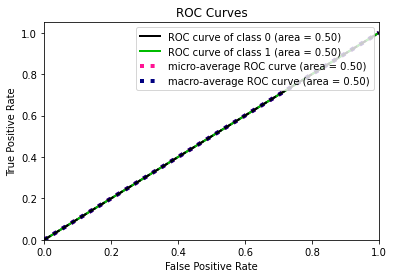

In [13]:
y_score = clf.predict_proba(X_test)
plot_roc(y_test, y_score)
plt.legend()
plt.show()

In [14]:
y_score

array([[0.95705521, 0.04294479],
       [0.95705521, 0.04294479],
       [0.95705521, 0.04294479],
       ...,
       [0.95705521, 0.04294479],
       [0.95705521, 0.04294479],
       [0.95705521, 0.04294479]])

In [15]:
len(X_train[0]), len(X_test[0])

(376, 376)

In [16]:
clf = DecisionTreeClassifier(min_samples_leaf=3)
clf.fit(X_train, y_train)

y_pred0 = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred0))
print('F1-score %s' % f1_score(y_test, y_pred0, average=None))
print(classification_report(y_test, y_pred0))

Accuracy 0.8589743589743589
F1-score [0.875      0.83823529]
              precision    recall  f1-score   support

           0       0.79      0.99      0.88       312
           1       0.98      0.73      0.84       312

    accuracy                           0.86       624
   macro avg       0.88      0.86      0.86       624
weighted avg       0.88      0.86      0.86       624



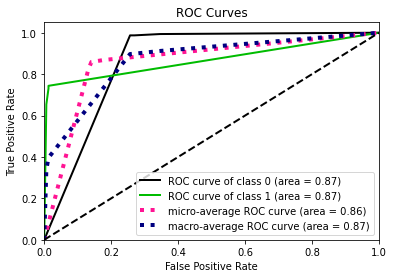

In [17]:
y_score = clf.predict_proba(X_test)
plot_roc(y_test, y_score)
plt.show()

In [18]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train, y_train)

def adjusted_predict(X, thr=0.5):
    y_score = clf.predict_proba(X_test)[:, 1]
    return np.array([1 if y > thr else 0 for y in y_score])

y_pred = adjusted_predict(X_test, thr=0.9)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8317307692307693
F1-score [0.85436893 0.80075901]
              precision    recall  f1-score   support

           0       0.75      0.99      0.85       312
           1       0.98      0.68      0.80       312

    accuracy                           0.83       624
   macro avg       0.87      0.83      0.83       624
weighted avg       0.87      0.83      0.83       624



## PCA

In [19]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_train)

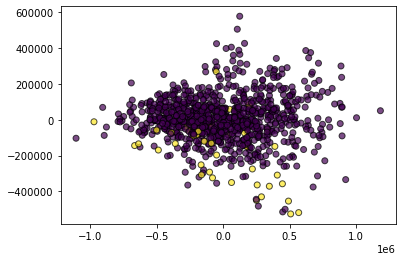

In [20]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, edgecolor='k', alpha=0.7)
plt.show()

## Undersampling

### Random Undersampler

In [21]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 42, 1: 42})


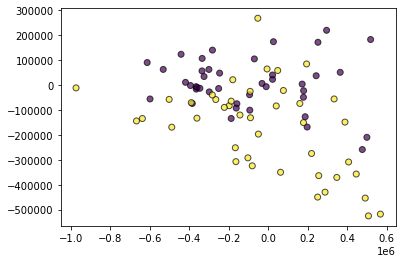

In [22]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, edgecolor='k', alpha=0.7)
plt.show()

In [23]:
clf = DecisionTreeClassifier(criterion = "gini", max_depth = 51, max_leaf_nodes = 123, min_samples_leaf = 0.003, min_samples_split = 0.0007)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9134615384615384
F1-score [0.90753425 0.9186747 ]
              precision    recall  f1-score   support

           0       0.97      0.85      0.91       312
           1       0.87      0.98      0.92       312

    accuracy                           0.91       624
   macro avg       0.92      0.91      0.91       624
weighted avg       0.92      0.91      0.91       624



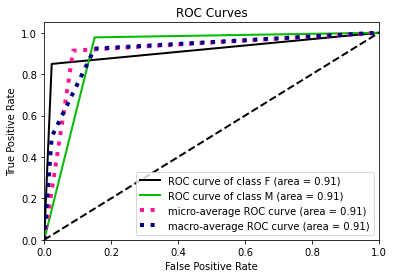

In [24]:
y_score = clf.predict_proba(X_test)
plot_roc(np.where(y_test==0, "F", "M"), y_score)
plt.show()

### Condensed nearest neighbor

In [25]:
import warnings
warnings.simplefilter("ignore")

In [26]:
cnn = CondensedNearestNeighbour(random_state=42, n_jobs=-1)
X_res, y_res = cnn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 110, 1: 42})


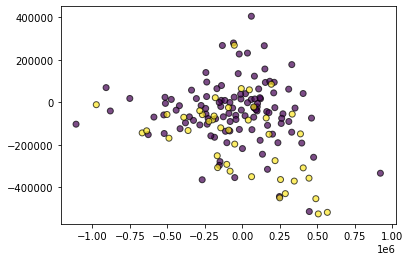

In [27]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, edgecolor='k', alpha=0.7)
plt.show()

In [28]:
clf = DecisionTreeClassifier(criterion = "gini", max_depth = 51, max_leaf_nodes = 123, min_samples_leaf = 0.003, min_samples_split = 0.0007)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8509615384615384
F1-score [0.85930408 0.84156729]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       312
           1       0.90      0.79      0.84       312

    accuracy                           0.85       624
   macro avg       0.86      0.85      0.85       624
weighted avg       0.86      0.85      0.85       624



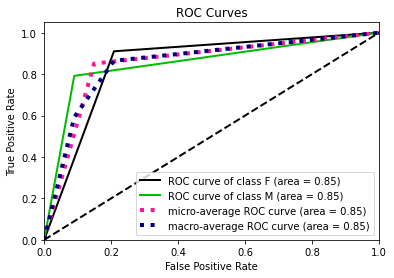

In [29]:
y_score = clf.predict_proba(X_test)
plt
plot_roc(np.where(y_test==0, "F", "M"), y_score)
plt.show()

## Tomek Links

In [30]:
tl = TomekLinks(sampling_strategy="auto")
X_res, y_res = tl.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 924, 1: 42})


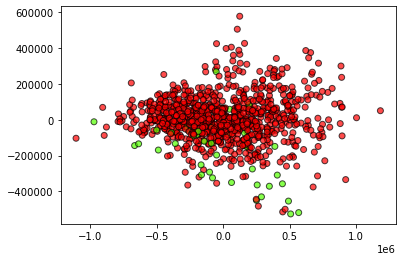

In [31]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [32]:
accuracy_tomek, f1_tomek = [], []
for i in range(1,15):
    tom = TomekLinks(sampling_strategy="auto", n_jobs=-1)
    X_res, y_res = tom.fit_resample(X_train, y_train)
    clf = DecisionTreeClassifier(min_samples_leaf=i, random_state=42)
    clf.fit(X_res, y_res)
    rskf = RepeatedStratifiedKFold()
    accuracy = cross_val_score(clf,X_res,y_res,cv=rskf,scoring="accuracy")
    f1 = cross_val_score(clf,X_res,y_res,cv=rskf,scoring="f1_weighted")

    accuracy_tomek.append(accuracy.mean())
    f1_tomek.append(f1.mean())
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [33]:
np.argmax(accuracy_tomek), max(accuracy_tomek)

(5, 0.9688430105229422)

In [34]:
np.argmax(f1_tomek), max(f1_tomek)

(5, 0.9666663199713103)

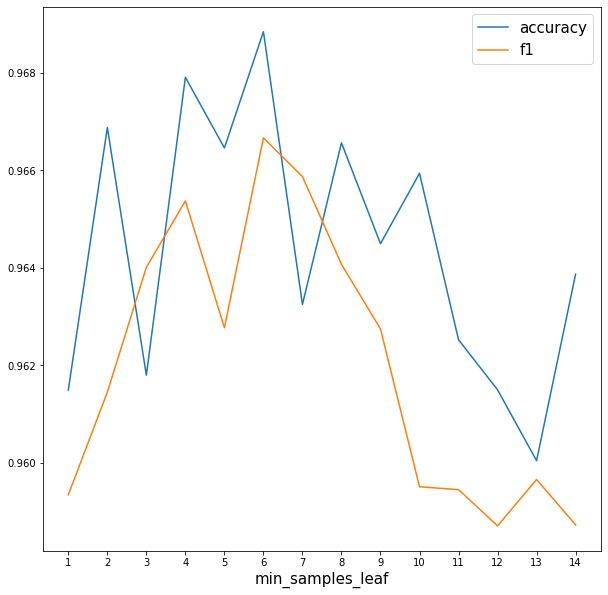

In [35]:
plt.figure(figsize=(10,10))
plt.plot(np.arange(1, len(accuracy_tomek)+1), accuracy_tomek, label="accuracy")
plt.plot(np.arange(1, len(f1_tomek)+1), f1_tomek, label="f1")
plt.legend(fontsize=15)
plt.xlabel("min_samples_leaf", fontsize=15)
plt.xticks(np.arange(1,len(f1_tomek)+1))
plt.show()

Miglior è min_samples_leaf=2

In [36]:
tl = TomekLinks(sampling_strategy="auto")
X_res, y_res = tl.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 924, 1: 42})


In [37]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8814102564102564
F1-score [0.89212828 0.8683274 ]
              precision    recall  f1-score   support

           0       0.82      0.98      0.89       312
           1       0.98      0.78      0.87       312

    accuracy                           0.88       624
   macro avg       0.90      0.88      0.88       624
weighted avg       0.90      0.88      0.88       624



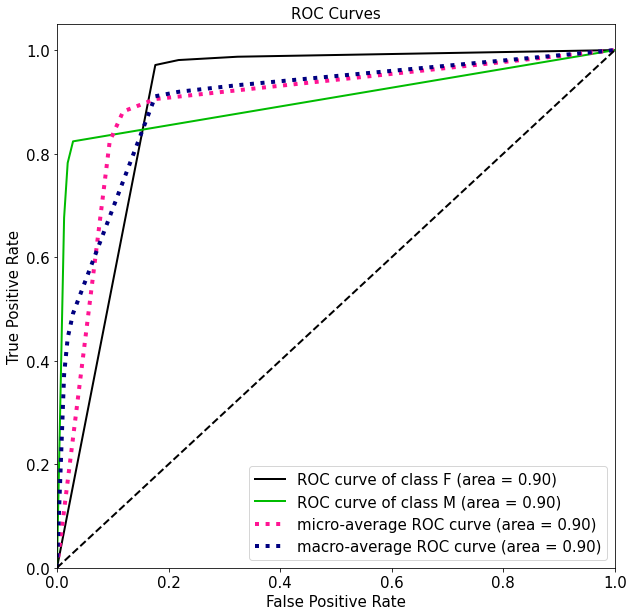

In [38]:
y_score = clf.predict_proba(X_test)
plot_roc(np.where(y_test==0, "F", "M"), y_score, figsize=(10,10), title_fontsize=15, text_fontsize=15)
plt.show()

## Edited Nearest Neighbor

In [39]:
enn = EditedNearestNeighbours()
X_res, y_res = enn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 880, 1: 42})


In [40]:

accuracy_all, f1_all = [], []
for i in range(1,15):
    enn = EditedNearestNeighbours(n_neighbors=i, kind_sel="all", n_jobs=-1)
    X_res, y_res = enn.fit_resample(X_train, y_train)
    clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
    clf.fit(X_res, y_res)
    rskf = RepeatedStratifiedKFold()
    accuracy = cross_val_score(clf,X_res,y_res,cv=rskf,scoring="accuracy")
    f1 = cross_val_score(clf,X_res,y_res,cv=rskf,scoring="f1_weighted")

    accuracy_all.append(accuracy.mean())
    f1_all.append(f1.mean())
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [41]:
np.argmax(accuracy_all), accuracy_all[np.argmax(accuracy_all)]

(6, 0.9698651252408479)

In [42]:
np.argmax(f1_all), f1_all[np.argmax(f1_all)]

(6, 0.9707224361688115)

Best nearest_neighbors=7/10

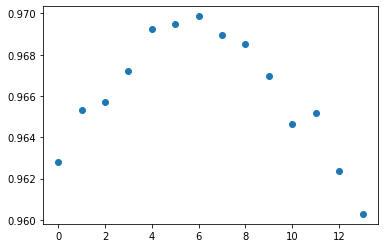

In [43]:
plt.scatter(np.arange(len(accuracy_all)), accuracy_all) 
plt.show()

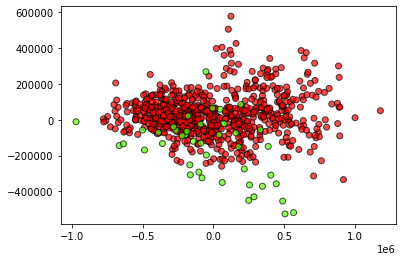

In [44]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [45]:
enn = EditedNearestNeighbours(n_neighbors=7, kind_sel="all")
X_res, y_res = enn.fit_resample(X_train, y_train)
accuracy_tree, f1_tree = [], []
for i in range(1,20):
    clf = DecisionTreeClassifier(min_samples_leaf=i, class_weight=None, random_state=42)
    clf.fit(X_res, y_res)
    rskf = RepeatedStratifiedKFold()
    accuracy = cross_val_score(clf,X_res,y_res,cv=rskf,scoring="accuracy")
    f1 = cross_val_score(clf,X_res,y_res,cv=rskf,scoring="f1_weighted")

    accuracy_tree.append(accuracy.mean())
    f1_tree.append(f1.mean())
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [46]:
np.argmax(accuracy_tree), accuracy_tree[np.argmax(accuracy_tree)]

(4, 0.9725200983323365)

In [47]:
np.argmax(f1_tree), f1_tree[np.argmax(f1_tree)]

(3, 0.9721454337627092)

In [48]:
enn = EditedNearestNeighbours(n_neighbors=10, kind_sel="all")
X_res, y_res = enn.fit_resample(X_train, y_train)
accuracy_tree, f1_tree = [], []
for i in range(1,16):
    clf = DecisionTreeClassifier(min_samples_leaf=i, class_weight=None, random_state=42)
    clf.fit(X_res, y_res)
    rskf = RepeatedStratifiedKFold()
    accuracy = cross_val_score(clf,X_res,y_res,cv=rskf,scoring="accuracy")
    f1 = cross_val_score(clf,X_res,y_res,cv=rskf,scoring="f1_weighted")

    accuracy_tree.append(accuracy.mean())
    f1_tree.append(f1.mean())
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [49]:
np.argmax(accuracy_tree), accuracy_tree[np.argmax(accuracy_tree)]

(3, 0.969421286031042)

In [50]:
np.argmax(f1_tree), f1_tree[np.argmax(f1_tree)]

(3, 0.9669991224339889)

Miglior numero di min_sample_leaf è 2 con fissati neighbors 7

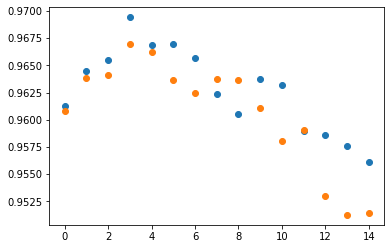

In [51]:
plt.scatter(np.arange(len(accuracy_tree)), accuracy_tree)
plt.scatter(np.arange(len(f1_tree)), f1_tree) 
plt.show()

In [52]:
enn = EditedNearestNeighbours(n_neighbors=7)
X_res, y_res = enn.fit_resample(X_train, y_train)
clf = DecisionTreeClassifier(min_samples_leaf=2, class_weight=None, random_state=None)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9150641025641025
F1-score [0.92148148 0.90750436]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       312
           1       1.00      0.83      0.91       312

    accuracy                           0.92       624
   macro avg       0.93      0.92      0.91       624
weighted avg       0.93      0.92      0.91       624



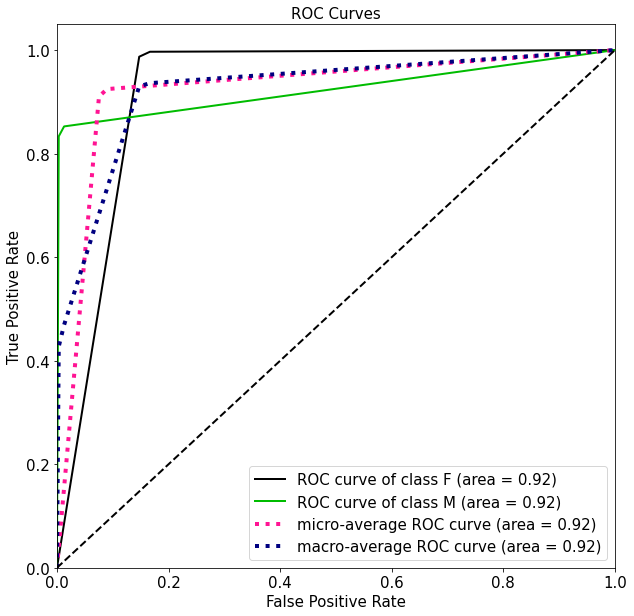

In [53]:
y_score = clf.predict_proba(X_test)
plot_roc(np.where(y_test==0, "F", "M"), y_score, figsize=(10,10), title_fontsize=15, text_fontsize=15)
plt.show()


## Cluster centroids

In [54]:
cc = ClusterCentroids(
    estimator=MiniBatchKMeans(n_init=1, random_state=0), random_state=42
)
X_res, y_res = cc.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 42, 1: 42})


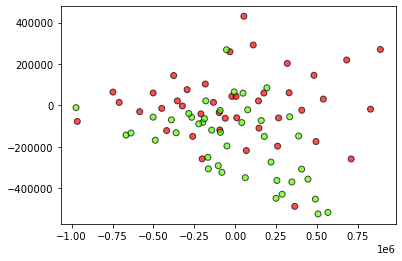

In [55]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [56]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8701923076923077
F1-score [0.85814361 0.88035451]
              precision    recall  f1-score   support

           0       0.95      0.79      0.86       312
           1       0.82      0.96      0.88       312

    accuracy                           0.87       624
   macro avg       0.88      0.87      0.87       624
weighted avg       0.88      0.87      0.87       624



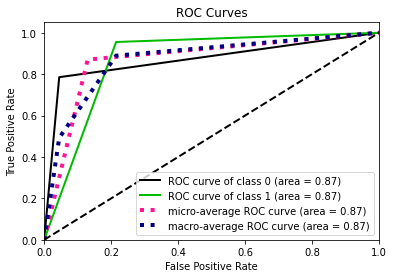

In [57]:
y_score = clf.predict_proba(X_test)
plot_roc(y_test, y_score)
plt.show()

# Oversampling

## Random oversampler

In [58]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 936, 1: 936})


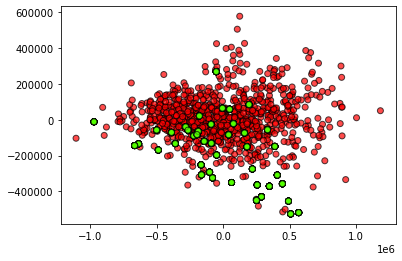

In [59]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [60]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8381410256410257
F1-score [0.85874126 0.81050657]
              precision    recall  f1-score   support

           0       0.76      0.98      0.86       312
           1       0.98      0.69      0.81       312

    accuracy                           0.84       624
   macro avg       0.87      0.84      0.83       624
weighted avg       0.87      0.84      0.83       624



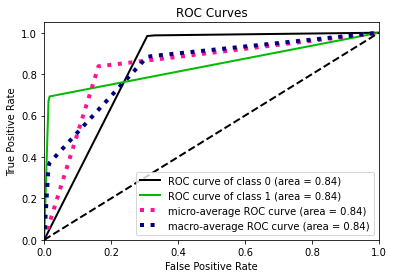

In [61]:
y_score = clf.predict_proba(X_test)
plot_roc(y_test, y_score)
plt.show()

## Smote

In [62]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 936, 1: 936})


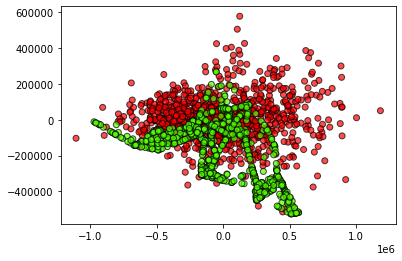

In [63]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [64]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7772435897435898
F1-score [0.81292059 0.72475248]
              precision    recall  f1-score   support

           0       0.70      0.97      0.81       312
           1       0.95      0.59      0.72       312

    accuracy                           0.78       624
   macro avg       0.82      0.78      0.77       624
weighted avg       0.82      0.78      0.77       624



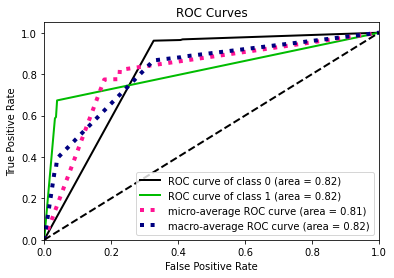

In [65]:
y_score = clf.predict_proba(X_test)
plot_roc(y_test, y_score)
plt.show()

## ADASYN

In [66]:
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 941, 0: 936})


In [ ]:
accuracy_ada, f1_ada = [], []
for i in range(1,21):
    ada = ADASYN(n_neighbors=i, n_jobs=-1)
    X_res, y_res = ada.fit_resample(X_train, y_train)
    clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
    clf.fit(X_res, y_res)
    rskf = RepeatedStratifiedKFold()
    accuracy = cross_val_score(clf,X_res,y_res,cv=rskf,scoring="accuracy")
    f1 = cross_val_score(clf,X_res,y_res,cv=rskf,scoring="f1_weighted")

    accuracy_ada.append(accuracy.mean())
    f1_ada.append(f1.mean())
    print(i)

1
2
3
4
5
6


In [ ]:
np.argmax(accuracy_ada), max(accuracy_ada)

In [ ]:
np.argmax(f1_ada), max(f1_ada)

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(np.arange(1,len(accuracy_ada)+1), accuracy_ada, label="accuracy")
plt.plot(np.arange(1,len(f1_ada)+1), f1_ada, label="f1")
plt.legend(fontsize=15)
plt.xlabel("n_neighbors", fontsize=15)
plt.xticks(np.arange(1,len(f1_ada)+1))
plt.show()

Miglior nearest_neighbor=2

In [ ]:
ada = ADASYN(random_state=None, n_neighbors=2)
X_res, y_res = ada.fit_resample(X_train, y_train)
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

In [ ]:
y_score = clf.predict_proba(X_test)
plot_roc(np.where(y_test==0, "F", "M"), y_score, figsize=(10,10), title_fontsize=15, text_fontsize=15)
plt.show()

In [ ]:
ca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [ ]:

ada = ADASYN(n_neighbors=2)
X_res, y_res = ada.fit_resample(X_train, y_train)
accuracy_tree, f1_tree = [], []
for i in range(1,8):
    clf = DecisionTreeClassifier(min_samples_leaf=i, class_weight=None, random_state=42)
    clf.fit(X_res, y_res)
    rskf = RepeatedStratifiedKFold()
    accuracy = cross_val_score(clf,X_res,y_res,cv=rskf,scoring="accuracy")
    f1 = cross_val_score(clf,X_res,y_res,cv=rskf,scoring="f1_weighted")

    accuracy_tree.append(accuracy.mean())
    f1_tree.append(f1.mean())
    print(i)


In [ ]:
np.argmax(accuracy_tree), accuracy_tree[np.argmax(accuracy_tree)]

In [ ]:
np.argmax(f1_tree), f1_tree[np.argmax(f1_tree)]

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(accuracy_tree, label="accuracy") 
plt.plot(f1_tree, label="f1") 
plt.legend(fontsize=15)
plt.xlabel("min_samples_leaf", fontsize=15)
plt.show()

Migliore min_sample_leaf=1 per n_neighbors=2

In [ ]:
ada = ADASYN(random_state=None, n_neighbors=2)
X_res, y_res = ada.fit_resample(X_train, y_train)
clf = DecisionTreeClassifier(min_samples_leaf=1, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

In [ ]:
y_score = clf.predict_proba(X_test)
plot_roc(np.where(y_test==0, "F", "M"), y_score, figsize=(10,10), title_fontsize=15, text_fontsize=15)
plt.show()

# Class weight

In [ ]:
np.unique(y_train, return_counts=True)

In [ ]:
929/39

In [ ]:
fs = [int(x) for x in np.linspace(2,10,num=9)]
fs

In [ ]:
'''
param_grid = {
    "min_samples_leaf": [int(x) for x in np.linspace(1,20,num=20)],
    "criterion": ["gini", "entropy"],
    "min_samples_split": [int(x) for x in np.linspace(2,10,num=9)],
    "max_features": ["sqrt", "log2", None]
}
grid = GridSearchCV(
    DecisionTreeClassifier(class_weight={0:1, 1:24}),
    param_grid=param_grid,
    scoring="accuracy",
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1
)
grid.fit(X_train, y_train)
clf = grid.best_params_
'''

In [ ]:
#grid.best_params_

Best params are min_samples_leaf=1, min_samples_split=5, max_features=sqrt, criterion="entropy"

In [ ]:
clf = DecisionTreeClassifier(min_samples_leaf=1, min_samples_split=5, max_features="sqrt", criterion="entropy",
                             class_weight={0:1, 1:24}, random_state=None)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

In [ ]:
y_score = clf.predict_proba(X_test)
plot_roc(y_test, y_score)
plt.show()

## Corrected decision tree

In [ ]:
def is_leaf(inner_tree, index):
    # Check whether node is leaf node
    return (inner_tree.children_left[index] == TREE_LEAF and
            inner_tree.children_right[index] == TREE_LEAF)


def prune_index(inner_tree, decisions, index=0):
    # Start pruning from the bottom - if we start from the top, we might miss
    # nodes that become leaves during pruning.
    # Do not use this directly - use prune_duplicate_leaves instead.
    if not is_leaf(inner_tree, inner_tree.children_left[index]):
        prune_index(inner_tree, decisions, inner_tree.children_left[index])
    if not is_leaf(inner_tree, inner_tree.children_right[index]):
        prune_index(inner_tree, decisions, inner_tree.children_right[index])

    # Prune children if both children are leaves now and make the same decision:
    if (is_leaf(inner_tree, inner_tree.children_left[index]) and
        is_leaf(inner_tree, inner_tree.children_right[index]) and
        (decisions[index] == decisions[inner_tree.children_left[index]]) and
        (decisions[index] == decisions[inner_tree.children_right[index]])):
        # turn node into a leaf by "unlinking" its children
        inner_tree.children_left[index] = TREE_LEAF
        inner_tree.children_right[index] = TREE_LEAF
        # print("Pruned {}".format(index))


def prune_duplicate_leaves(dt):
    # Remove leaves if both
    decisions = dt.tree_.value.argmax(axis=2).flatten().tolist()  # Decision for each node
    prune_index(dt.tree_, decisions)

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

In [ ]:
plt.figure(figsize=(10,10))
tree.plot_tree(clf)
plt.show()

In [ ]:
prune_duplicate_leaves(clf)

In [ ]:
plt.figure(figsize=(10,10))
tree.plot_tree(clf)
plt.show()